julia\doc\src\base\numbers.md 这个base下有很多 md<br> 
julia\doc\src\base\base.md <br>

\julia\base\boot.jl<br>
\julia\base\base.jl 有很多 property field 的 get 和 set 函数

https://docs.juliacn.com/latest/manual/types/

In [73]:
using General.Aux

In [105]:
struct Foo
    bar
    baz::Int
    qux::Float64
end
foo = Foo("张三", 18, 89.9)
@logt foo
fieldnames(Foo)
foo.bar |> display
fieldnames(foo) # 示例不适用于 fieldnames，只能对DataType

"张三"


foo, Foo
  = Foo("张三", 18, 89.9)


MethodError: MethodError: no method matching fieldnames(::Foo)

Closest candidates are:
  fieldnames(!Matched::Core.TypeofBottom)
   @ Base reflection.jl:170
  fieldnames(!Matched::Type{<:Tuple})
   @ Base reflection.jl:172
  fieldnames(!Matched::UnionAll)
   @ Base reflection.jl:169
  ...


In [108]:
@logt Int64 Dict Pair Foo Complex DataType Any Type UnionAll AbstractFloat


Int64, DataType
  = Int64

Dict, UnionAll
  = Dict

Pair, UnionAll
  = Pair

Foo, DataType
  = Foo

Complex, UnionAll
  = Complex

DataType, DataType
  = DataType

Any, DataType
  = Any

Type, UnionAll
  = Type

UnionAll, DataType
  = UnionAll

AbstractFloat, DataType
  = AbstractFloat


In [62]:
# fieldnames 对属于DataType类型的有效
fieldnames(DataType) |> display
fieldnames(Int64) |> display
fieldnames(Float64) |> display
fieldnames(Complex) |> display
fieldnames(Type) |> display

(:name, :super, :parameters, :types, :instance, :layout, :hash, :flags)

()

()

(:re, :im)

ArgumentError: ArgumentError: type does not have a definite number of fields

In [70]:
(10 isa Int64) |> display
((1 + 2im) isa Complex) |> display
# fieldnames(10) |> display
fieldnames(1 + 2im) |> display

true

true

MethodError: MethodError: no method matching fieldnames(::Complex{Int64})

Closest candidates are:
  fieldnames(!Matched::Core.TypeofBottom)
   @ Base reflection.jl:170
  fieldnames(!Matched::Type{<:Tuple})
   @ Base reflection.jl:172
  fieldnames(!Matched::UnionAll)
   @ Base reflection.jl:169
  ...


[**Visualize the Julia Type Tree**](https://stackoverflow.com/questions/71524602/visualize-the-julia-type-tree)

In [26]:
using AbstractTrees
AbstractTrees.children(d::DataType) = subtypes(d)

In [31]:
print_tree(Type)

Type


In [29]:
print_tree(DataType)

DataType


In [28]:
print_tree(Number)

Number
├─ MultiplicativeInverse
├─ Complex
├─ Measurement
└─ Real
   ├─ AbstractFloat
   │  ├─ BigFloat
   │  ├─ Float16
   │  ├─ Float32
   │  └─ Float64
   ├─ AbstractIrrational
   │  ├─ Irrational
   │  └─ IrrationalConstant
   │     ├─ Fourinvπ
   │     ├─ Fourπ
   │     ├─ Halfπ
   │     ├─ Inv2π
   │     ├─ Inv4π
   │     ├─ Invsqrt2
   │     ├─ Invsqrt2π
   │     ├─ Invsqrtπ
   │     ├─ Invπ
   │     ├─ Log2π
   │     ├─ Log4π
   │     ├─ Loghalf
   │     ├─ Logten
   │     ├─ Logtwo
   │     ├─ Logπ
   │     ├─ Quartπ
   │     ├─ Sqrt2
   │     ├─ Sqrt2π
   │     ├─ Sqrt3
   │     ├─ Sqrt4π
   │     ├─ Sqrthalfπ
   │     ├─ Sqrtπ
   │     ├─ Twoinvπ
   │     └─ Twoπ
   ├─ FixedPoint
   ├─ Integer
   │  ├─ Bool
   │  ├─ OffsetInteger
   │  ├─ OffsetInteger
   │  ├─ Signed
   │  │  ├─ BigInt
   │  │  ├─ Int128
   │  │  ├─ Int16
   │  │  ├─ Int32
   │  │  ├─ Int64
   │  │  └─ Int8
   │  └─ Unsigned
   │     ├─ UInt128
   │     ├─ UInt16
   │     ├─ UInt32
   │     ├─ UInt64
   │  

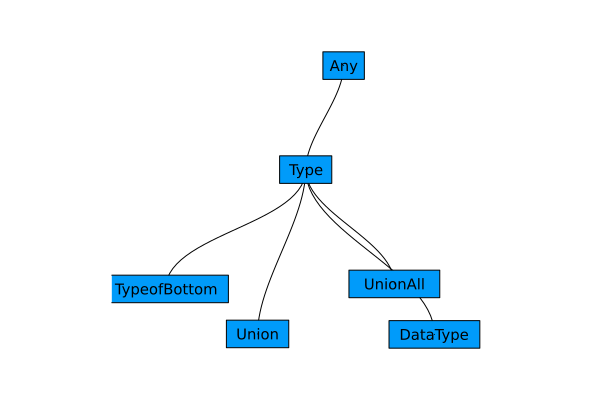

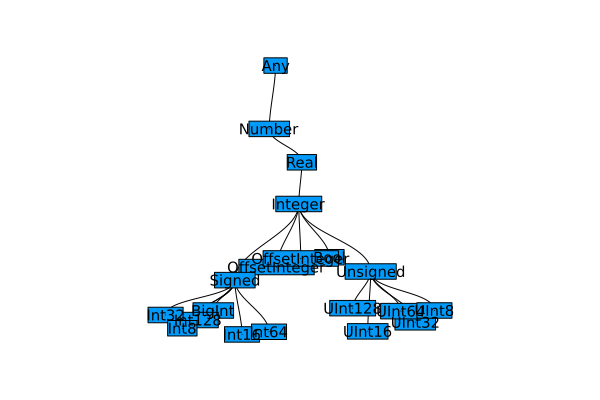

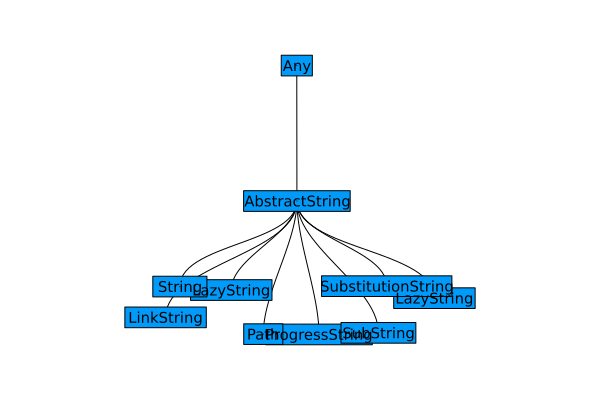

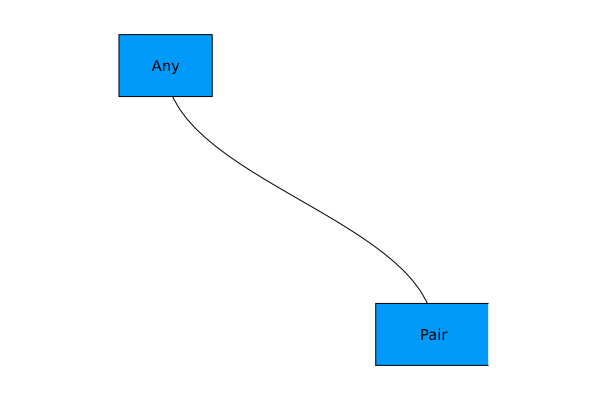

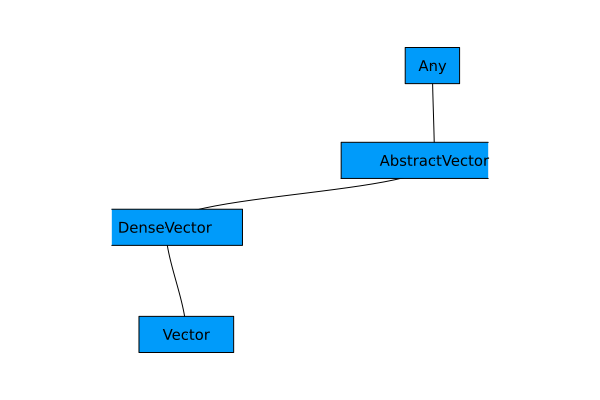

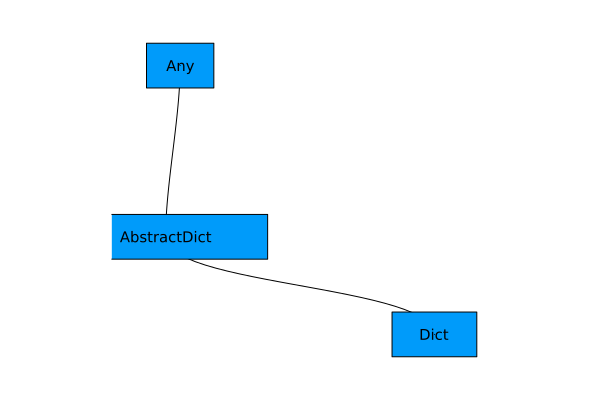

In [85]:
using GraphRecipes, Plots
plot(Type, method=:tree, fontsize=10, nodeshape=:rect) |> display
plot(Integer, method=:tree, fontsize=10, nodeshape=:rect) |> display
plot(AbstractString, method=:tree, fontsize=10, nodeshape=:rect) |> display
plot(Pair, method=:tree, fontsize=10, nodeshape=:rect) |> display
plot(Vector, method=:tree, fontsize=10, nodeshape=:rect) |> display
plot(Dict, method=:tree, fontsize=10, nodeshape=:rect) |> display

In [106]:
fieldnames(Pair) |> display # 复合数据
fieldnames(Dict) |> display
fieldnames(Vector) |> display
fieldnames(Int64) |> display
fieldnames(Integer) |> display # 抽象的没有

(:first, :second)

(:slots, :keys, :vals, :ndel, :count, :age, :idxfloor, :maxprobe)

()

()

ArgumentError: ArgumentError: type does not have a definite number of fields

```julia
# Julia boot.jl 里的 Pair Struct定义, 和自定义类型的定义方法一样
struct Pair{A, B}
    first::A
    second::B    
    Pair(a, b) = new{typeof(a), typeof(b)}(a, b)
    function Pair{A, B}(@nospecialize(a), @nospecialize(b)) where {A, B}
        @inline
        return new(a::A, b::B)
    end
end

# Julia complex.jl中的 Struct
struct Complex{T<:Real} <: Number
    re::T
    im::T
end
Complex(x::Real, y::Real) = Complex(promote(x,y)...)
Complex(x::Real) = Complex(x, zero(x))
```

In [51]:
(DataType <: Type <: Any) |> display
(DataType <: Type ) |> display
(DataType <: Any ) |> display

true

true

true

In [60]:
(Foo <: DataType) |> display # 未定义属于DataType
(Foo <: Any) |> display
Int64 <: DataType  
# Int64本身的类型 是一种DataType,但Int64本身即自己(value)"Int64"为某种Type,不在Type树
10 <: Int64

false

true

TypeError: TypeError: in <:, expected Type, got a value of type Int64

In [75]:
(Integer <: Number) |> display
(Int64 <: Integer <: Number <:Any) |> display

true

true

In [77]:
(Integer <: Number) |> display # 可以跨级

true

In [121]:
struct Foo2 <: DataType
    bar
    baz::Int
    qux::Float64
end

ErrorException: invalid subtyping in definition of Foo2: cannot add subtypes to Type.

In [131]:
struct Foo3 <: DataType  # 不能把自定义type定义到DataType
    bar
    baz
    qux
end

ErrorException: invalid subtyping in definition of Foo3: cannot add subtypes to Type.

In [133]:
struct Foo3
    bar
    baz
    qux
end

In [148]:
struct Foo4{T1, T2, T3}
    bar::T1
    baz::T2
    qux::T3
end
@logt Foo4
(Foo4 <:UnionAll) |> display
(Foo4 <:Any) |> display

false

true


Foo4, UnionAll
  = Foo4


In [151]:
struct Foo5{T1, T2, T3} <:UnionAll  # 也不能归为现有的 UnionAll Type
    bar::T1
    baz::T2
    qux::T3
end

ErrorException: invalid subtyping in definition of Foo5: cannot add subtypes to Type.

In [155]:
struct Foo5{T1, T2, T3} <:Any  # 这个可以，但没有意义
    bar::T1
    baz::T2
    qux::T3
end